<a href="https://colab.research.google.com/github/Josphat-Malombe/deep_learning/blob/main/model_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
#data
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.75MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
class_names=train_data.classes
class_names,len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [ ]:
#visualizing
#torch.manual_seed(70)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

NameError: name 'plt' is not defined

In [ ]:
#loading the data using dataloader
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

In [ ]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
#flattening data
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
#creating model
class FashionMnist(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape),


    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
#initializing model
model_005=FashionMnist(input_shape=784,hidden_units=10,output_shape=len(class_names))

In [ ]:
#ACCURACY Function
def Accuracy(y_true, y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
#optimizer and loss
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_005.parameters(),lr=0.1)

In [ ]:
#timer function
from timeit import default_timer as Timer
def print_train_time(start:float,end:float):
  total_time=end-start
  return total_time

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start=Timer()
epochs=5

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n----------------------")
  train_loss=0
  for batch,(X,y) in enumerate(train_dataloader):
    model_005.train()
    y_pred=model_005(X)
    loss=criterion(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)





  test_loss,test_acc=0,0
  model_005.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred=model_005(X)
      test_loss+=criterion(test_pred,y)
      test_acc+=Accuracy(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"\nTrain Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")
  train_time_end=Timer()
  print(f"Train time: {print_train_time(train_time_start,train_time_end)}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0
----------------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train Loss: 0.59562 | Test Loss: 0.50188 | Test Accuracy: 82.30%

Train time: 8.416491558999951
Epoch:1
----------------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train Loss: 0.47778 | Test Loss: 0.48217 | Test Accuracy: 83.06%

Train time: 16.155448987
Epoch:2
----------------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train Loss: 0.45559 | Test Loss: 0.47993 | Test Accuracy: 83.40%

Train time: 24.377992890999963
Epoch:3
----------------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Trai

Saving download.jpeg to download.jpeg
processing download.jpeg....
Min: <built-in method min of Tensor object at 0x7922c7c9ae10>, Max: <built-in method max of Tensor object at 0x7922c7c9ae10>


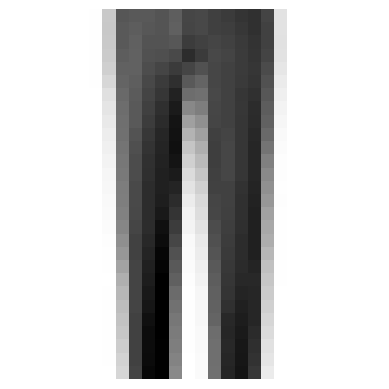

the piece of clothe is a : Bag


In [ ]:
"""
from PIL import Image
import torchvision.transforms as transforms

def preprocess(image_path):
  img=Image.open(image_path).convert('L')
  transform=transforms.Compose([
      transforms.Resize((28,28)),
      transforms.ToTensor(),
      transforms.Normalize((0.5,),(0.5,))

  ])

  img_tensor=transform(img).unsqueeze(0)
  print(f"Min: {img_tensor.min}, Max: {img_tensor.max}")
  img_tensor=img_tensor.unsqueeze(0)
  return img_tensor
def predict(model,image_tensor,class_names):
  model.eval()
  with torch.inference_mode():
    output=model(image_tensor)
    prediction=output.argmax(dim=1).item()
  return class_names[prediction]

from google.colab import files
uploaded=files.upload()

for filename in uploaded.keys():
  print(f"processing {filename}....")
  image_tensor=preprocess(filename)

  plt.imshow(image_tensor.squeeze(),cmap="gray")
  plt.axis(False)
  plt.show()

  predicted_class=predict(model_005,image_tensor,class_names)
  print(f"the piece of clothe is a : {predicted_class}")

"""